In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy

def rdexcel(a):
    return pd.read_excel(a).as_matrix()

def plot3D(a,b):
    x,y=np.meshgrid(a,b);
    z=x**2+y**2; #write relation here
    plt.figure().add_subplot(111,projection='3d').plot_surface(x,y,z)

def syplot(eq,*argv):
    tup=tuple();
    for i in argv:
        tup=tup+tuple(i)
    sy.plotting.plot3d(eq,tup)   

In [0]:
a=pd.read_excel('ex2data1-logistic.xls')
b=pd.read_excel('ex2data2-logistic.xls')

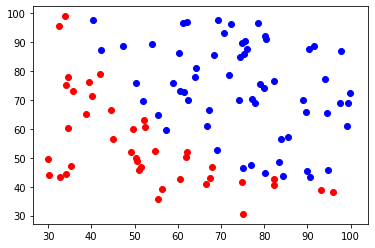

In [3]:
#Q1 a
x1a=np.array(a['x1'])
x2a=np.array(a['x2'])
ya=np.array(a['y'])
redx=[]
redy=[]
bluex=[]
bluey=[]
for i in range(len(x1a)):
    if ya[i]==0:
        redx.append(x1a[i])
        redy.append(x2a[i])
    else:
        bluex.append(x1a[i])
        bluey.append(x2a[i])
plt.scatter(redx,redy,color='red')
plt.scatter(bluex,bluey,color='blue')

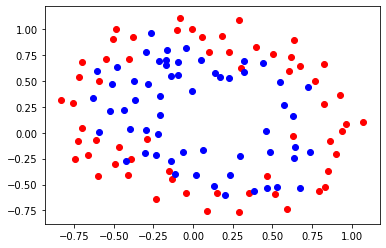

In [4]:
#Q1 b
x1a=np.array(b['x1'])
x2a=np.array(b['x2'])
ya=np.array(b['y'])
redx=[]
redy=[]
bluex=[]
bluey=[]
for i in range(len(x1a)):
    if ya[i]==0:
        redx.append(x1a[i])
        redy.append(x2a[i])
    else:
        bluex.append(x1a[i])
        bluey.append(x2a[i])
plt.scatter(redx,redy,color='red')
plt.scatter(bluex,bluey,color='blue')

[[1.4933906  3.9855096  3.64515543]] 1777
Correct:  9 / 10
for all examples Correct:  90 / 100


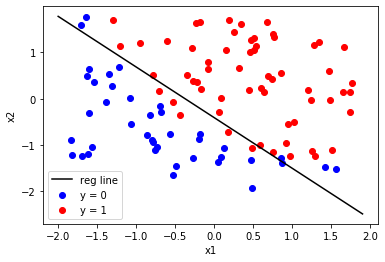

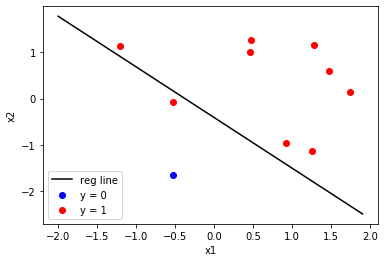

In [6]:
#Q2 a
def plot_reg(X, y, beta): 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
    x1 = np.arange(-2, 2, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
    
def cost(X,y,theta):
    h_theta=1/(1 + np.exp(-np.dot(X,theta.T)))
    coast= y*np.log(h_theta)+(1-y)*np.log(h_theta)
    coast=-1*coast
    return np.mean(coast)
    
def pred_values(beta, X): 
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
    
df = pd.read_excel('ex2data1-logistic.xls');

x11 = np.array(df['x1'])
x21 = np.array(df['x2'])
y1 = np.array(df['y'])

mean = np.mean(x11)
std = np.std(x11);
x11 = (x11-mean)/std;
mean = np.mean(x21)
std = np.std(x21);
x21 = (x21-mean)/std;

Xm=np.array([[1,x11[i],x21[i]] for i in range(len(x11))])
x1=np.array([x11[i] for i in range(int(0.9*len(x11)))])
x2=np.array([x21[i] for i in range(int(0.9*len(x11)))])
y=np.array([y1[i] for i in range(int(0.9*len(x11)))])



X=np.array([[1,x1[i],x2[i]] for i in range(len(x1))])

theta=np.matrix(np.zeros(X.shape[1])) 

coast=cost(X,y,theta)
oldcoast=coast+1

eps = 0.00001;
alpha = 0.01;
cnt = 0;
while ( abs(coast-oldcoast)>eps):
    oldcoast=coast
    h_theta=1/(1 + np.exp(-np.dot(X,theta.T)))
    temp=(h_theta-y.reshape(X.shape[0],-1))
    theta=theta-alpha*np.dot(temp.T,X)
    coast=cost(X,y,theta)
    cnt+=1

print(theta,cnt);

x1r=np.array([x11[i] for i in range(int(0.9*len(x11)), len(x11))])
x2r=np.array([x21[i] for i in range(int(0.9*len(x11)), len(x11))])
yr=np.array([y1[i] for i in range(int(0.9*len(x11)), len(x11))])
XR=np.array([[1,x1r[i],x2r[i]] for i in range(len(x1r))])

h_theta=1/(1 + np.exp(-np.dot(XR,theta.T)))
correctt=0
for i in range(len(x1r)):
    if h_theta[i]>=0.5:
        if yr[i]==1:
            correctt+=1
    else:
        if yr[i]==0:
            correctt+=1
print('Correct: ',correctt,'/',len(x1r))

h_theta=1/(1 + np.exp(-np.dot(Xm,theta.T)))
correctt=0
for i in range(len(x11)):
    if h_theta[i]>=0.5:
        if y1[i]==1:
            correctt+=1
    else:
        if y1[i]==0:
            correctt+=1
print('for all examples Correct: ',correctt,'/',len(x11))

plot_reg(Xm, y1, theta) 
plot_reg(XR,yr,theta)

[[ 0.25346759 -0.48331151 -0.05634097]] 57
on remainig 10% examples Correct:  1 / 12
for all examples Correct:  67 / 118


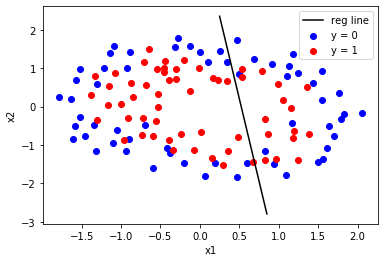

In [7]:
#Q2 b
def plot_reg(X, y, beta): 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
    x1 = np.arange(0.25, .9, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
    
def cost(X,y,theta):
    h_theta=1/(1 + np.exp(-np.dot(X,theta.T)))
    coast= y*np.log(h_theta)+(1-y)*np.log(h_theta)
    coast=-1*coast
    return np.mean(coast)
    
def pred_values(beta, X): 
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
    
df = pd.read_excel('ex2data2-logistic.xls');

x11 = np.array(df['x1'])
x21 = np.array(df['x2'])
y1 = np.array(df['y'])

mean = np.mean(x11)
std = np.std(x11);
x11 = (x11-mean)/std;
mean = np.mean(x21)
std = np.std(x21);
x21 = (x21-mean)/std;

Xm=np.array([[1,x11[i],x21[i]] for i in range(len(x11))])
x1=np.array([x11[i] for i in range(int(0.9*len(x11)))])
x2=np.array([x21[i] for i in range(int(0.9*len(x11)))])
y=np.array([y1[i] for i in range(int(0.9*len(x11)))])



X=np.array([[1,x1[i],x2[i]] for i in range(len(x1))])

theta=np.matrix(np.zeros(X.shape[1])) 

coast=cost(X,y,theta)
oldcoast=coast+1

eps = 0.00001;
alpha = 0.01;
cnt = 0;
while ( abs(coast-oldcoast)>eps):
    oldcoast=coast
    h_theta=1/(1 + np.exp(-np.dot(X,theta.T)))
    temp=(h_theta-y.reshape(X.shape[0],-1))
    theta=theta-alpha*np.dot(temp.T,X)
    coast=cost(X,y,theta)
    cnt+=1

print(theta,cnt);

x1r=np.array([x11[i] for i in range(int(0.9*len(x11)), len(x11))])
x2r=np.array([x21[i] for i in range(int(0.9*len(x11)), len(x11))])
yr=np.array([y1[i] for i in range(int(0.9*len(x11)), len(x11))])
XR=np.array([[1,x1r[i],x2r[i]] for i in range(len(x1r))])


h_theta=1/(1 + np.exp(-np.dot(XR,theta.T)))
correctt=0
for i in range(len(x1r)):
    if h_theta[i]>=0.5:
        if yr[i]==1:
            correctt+=1
    else:
        if yr[i]==0:
            correctt+=1
print('on remainig 10% examples Correct: ',correctt,'/',len(x1r))

h_theta=1/(1 + np.exp(-np.dot(Xm,theta.T)))
correctt=0
for i in range(len(x11)):
    if h_theta[i]>=0.5:
        if y1[i]==1:
            correctt+=1
    else:
        if y1[i]==0:
            correctt+=1
print('for all examples Correct: ',correctt,'/',len(x11))
 
plot_reg(Xm, y1, theta) 

[[ 4.68330257  0.02012317 -0.4396719  -2.08233772 -2.43711651]] 1171
on remainig 10% examples Correct:  8 / 12
for all examples Correct:  95 / 118


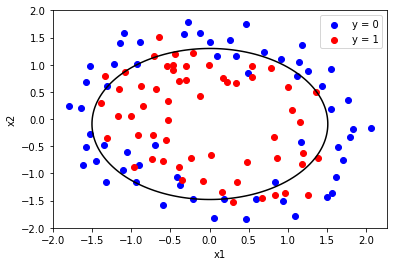

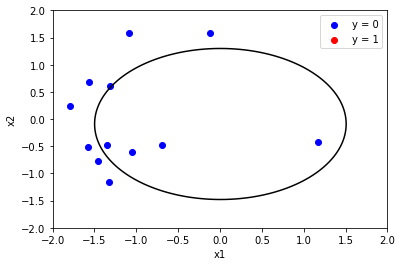

In [9]:
#Q2 b
def plot_reg(X, y, beta): 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    k=np.array(beta)
    xlist = np.linspace(-2.0, 2.0, 100) # Create 1-D arrays for x,y dimensions
    ylist = np.linspace(-2.0, 2.0, 100) 
    xx1,xx2 = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
    eq=k[0][0]+k[0][1]*xx1+k[0][2]*xx2+k[0][3]*(xx1**2)+k[0][4]*(xx2**2)
    plt.contour(xx1, xx2, eq, [0], colors = 'k', linestyles = 'solid')
    plt.show()
    
def cost(X,y,theta):
    h_theta=1/(1 + np.exp(-np.dot(X,theta.T)))
    coast= y*np.log(h_theta)+(1-y)*np.log(h_theta)
    coast=-1*coast
    return np.mean(coast)
    
def pred_values(beta, X): 
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
    
df = pd.read_excel('ex2data2-logistic.xls');

x11 = np.array(df['x1'])
x21 = np.array(df['x2'])
y1 = np.array(df['y'])

mean = np.mean(x11)
std = np.std(x11);
x11 = (x11-mean)/std;
mean = np.mean(x21)
std = np.std(x21);
x21 = (x21-mean)/std;

Xm=np.array([[1,x11[i],x21[i],x11[i]*x11[i],x21[i]*x21[i]] for i in range(len(x11))])
x1=np.array([x11[i] for i in range(int(0.9*len(x11)))])
x2=np.array([x21[i] for i in range(int(0.9*len(x11)))])
y=np.array([y1[i] for i in range(int(0.9*len(x11)))])
x12=x1**2
x22=x2**2


X=np.array([[1,x1[i],x2[i],x12[i],x22[i]] for i in range(len(x1))])

theta=np.matrix(np.zeros(X.shape[1])) 

coast=cost(X,y,theta)
oldcoast=coast+1

eps = 0.00001;
alpha = 0.01;
cnt = 0;
while ( abs(coast-oldcoast)>eps):
    oldcoast=coast
    h_theta=1/(1 + np.exp(-np.dot(X,theta.T)))
    temp=(h_theta-y.reshape(X.shape[0],-1))
    theta=theta-alpha*np.dot(temp.T,X)
    coast=cost(X,y,theta)
    cnt+=1

print(theta,cnt);

x1r=np.array([x11[i] for i in range(int(0.9*len(x11)), len(x11))])
x2r=np.array([x21[i] for i in range(int(0.9*len(x11)), len(x11))])
yr=np.array([y1[i] for i in range(int(0.9*len(x11)), len(x11))])
x12r=x1r**2
x22r=x2r**2
XR=np.array([[1,x1r[i],x2r[i],x12r[i],x22r[i]] for i in range(len(x1r))])

h_theta=1/(1 + np.exp(-np.dot(XR,theta.T)))
correctt=0
for i in range(len(x1r)):
    if h_theta[i]>=0.5:
        if yr[i]==1:
            correctt+=1
    else:
        if yr[i]==0:
            correctt+=1
print('on remainig 10% examples Correct: ',correctt,'/',len(x1r))

h_theta=1/(1 + np.exp(-np.dot(Xm,theta.T)))
correctt=0
for i in range(len(x11)):
    if h_theta[i]>=0.5:
        if y1[i]==1:
            correctt+=1
    else:
        if y1[i]==0:
            correctt+=1
print('for all examples Correct: ',correctt,'/',len(x11))
 
plot_reg(Xm, y1, theta) 
plot_reg(XR,yr,theta)